# Problem Statement

#### The goal is to understand the relationship between house features and how these variables affect the house price. Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model.

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as ns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Data Gathering

In [2]:
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


# EDA & Feature Engineering

# df["Transaction date"]

In [4]:
df["Transaction date"].unique()

array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.0833333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])

In [5]:
df["Transaction date"].nunique()

12

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Transaction date'>

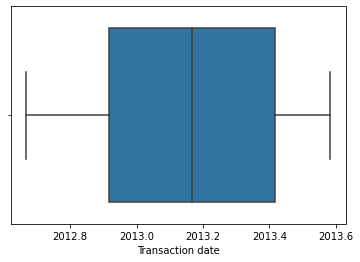

In [6]:
sns.boxplot(df["Transaction date"]) # there is no outliers

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Transaction date', ylabel='Density'>

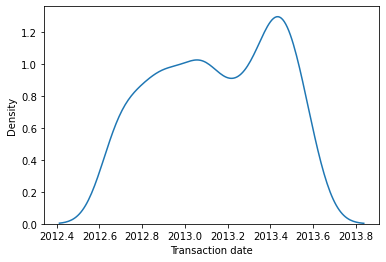

In [7]:
sns.kdeplot(df["Transaction date"])

# df['House Age']

In [8]:
df['House Age'].nunique()

236

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='House Age'>

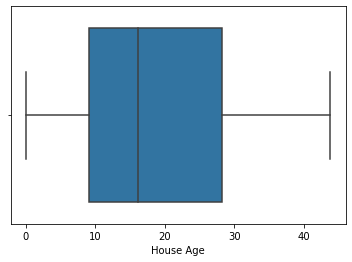

In [9]:
sns.boxplot(df['House Age']) # there is mo ouliers in this feature

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='House Age', ylabel='Count'>

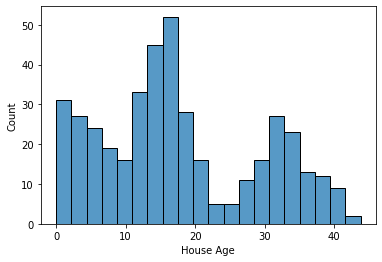

In [10]:
sns.histplot(df['House Age'],bins=20)  # most of the hosuse age is in the range of  10-20 

# df['Distance from nearest Metro station (km)']

In [11]:
df['Distance from nearest Metro station (km)'].nunique()

259

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Distance from nearest Metro station (km)'>

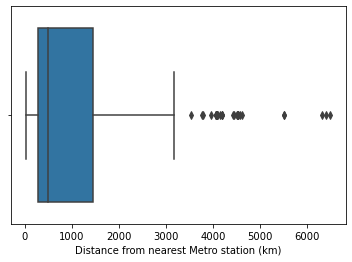

In [12]:
sns.boxplot(df['Distance from nearest Metro station (km)'])   # this feature has outliers

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='Density'>

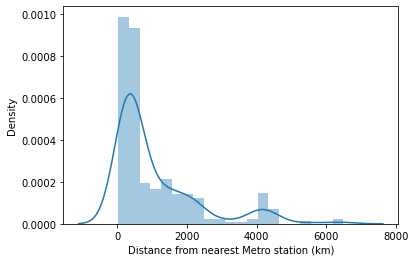

In [13]:
sns.distplot(df['Distance from nearest Metro station (km)'])

In [14]:
# Handling the outliers by using IQR method

In [15]:
q1=df['Distance from nearest Metro station (km)'].quantile(0.25)
q3=df['Distance from nearest Metro station (km)'].quantile(0.75)
iqr=q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail",upper_tail)
print("lower_tail",lower_tail)

upper_tail 3201.7103
lower_tail -1458.1065000000003


In [16]:
a=84.87882
def handling_outliers(a):
    if a<=upper_tail:
        return a
    else:
        return upper_tail
handling_outliers(a)

84.87882

In [17]:
df['Distance from nearest Metro station (km)']=df['Distance from nearest Metro station (km)'].apply(handling_outliers)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Distance from nearest Metro station (km)'>

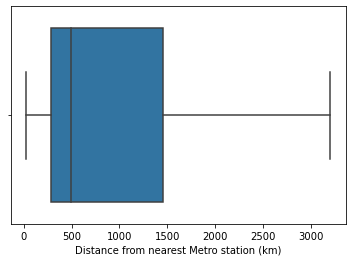

In [18]:
sns.boxplot(df['Distance from nearest Metro station (km)'])

# df["Number of convenience stores"]

In [19]:
df["Number of convenience stores"].nunique()

11

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Number of convenience stores', ylabel='count'>

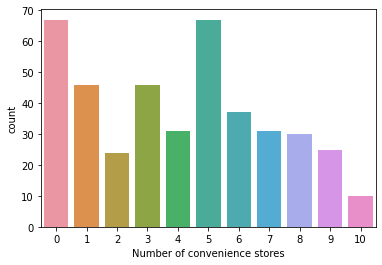

In [20]:
sns.countplot(df["Number of convenience stores"])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Number of convenience stores'>

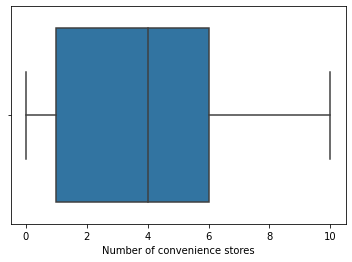

In [21]:
sns.boxplot(df["Number of convenience stores"])

# df["latitude"]

In [22]:
df["latitude"].nunique()

234

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='latitude'>

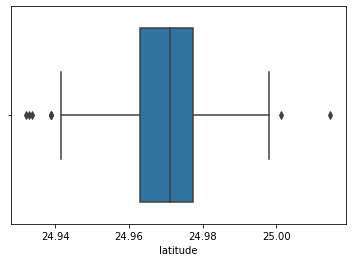

In [23]:
sns.boxplot(df["latitude"])

In [24]:
q1=df["latitude"].quantile(0.25)
q3=df["latitude"].quantile(0.75)
iqr=q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail",upper_tail)
print("lower_tail",lower_tail)

upper_tail 24.999137499999996
lower_tail 24.941317500000004


In [25]:
a=24.98298
def hand_out(a):
    if a<=lower_tail:
        return lower_tail
    elif a<=upper_tail:
        return a
    else:
        return upper_tail
hand_out(a)

24.98298

In [26]:
df["latitude"]=df["latitude"].apply(hand_out)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='latitude'>

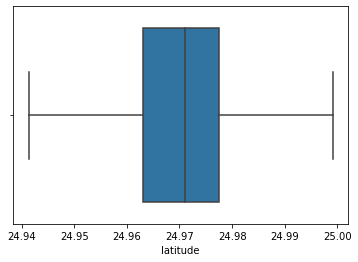

In [27]:
sns.boxplot(df["latitude"])

# df['longitude']

In [28]:
df['longitude'].nunique()

232

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='latitude'>

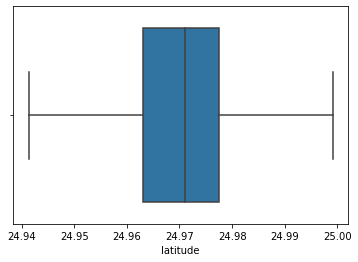

In [29]:
sns.boxplot(df["latitude"])

# df['Number of bedrooms']

In [30]:
df['Number of bedrooms'].nunique()

3

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

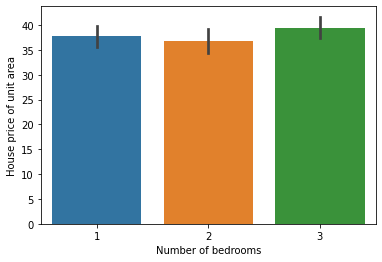

In [31]:
sns.barplot(x=df['Number of bedrooms'],y=df["House price of unit area"])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Number of bedrooms', ylabel='Density'>

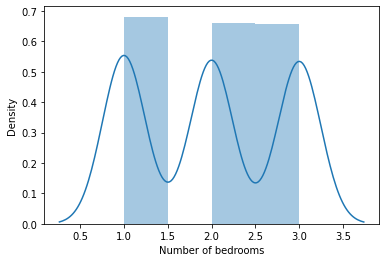

In [32]:
sns.distplot(df['Number of bedrooms'])

In [33]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

# df['House size (sqft)']

In [34]:
df['House size (sqft)'].nunique()

328

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='House size (sqft)'>

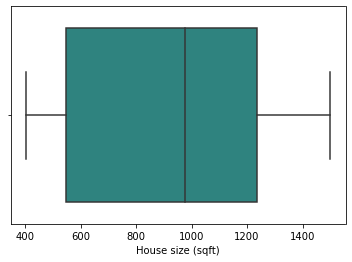

In [35]:
sns.boxplot(df['House size (sqft)'],palette='viridis')

# df['House price of unit area']

In [36]:
df['House price of unit area'].nunique()

270

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='House price of unit area'>

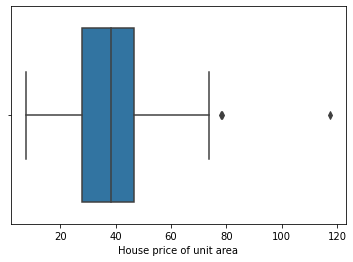

In [37]:
sns.boxplot(df['House price of unit area'])

# Feature Selection

<IPython.core.display.Javascript object>

<AxesSubplot:>

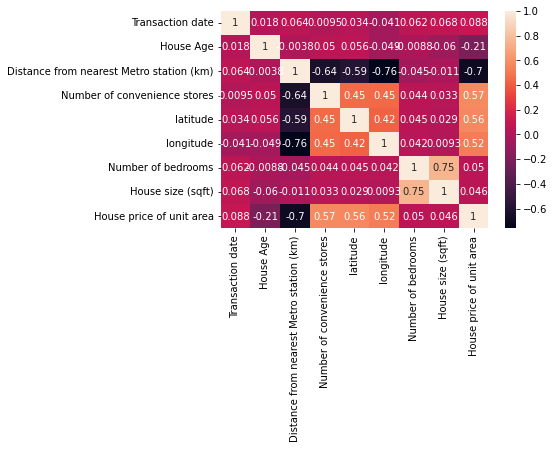

In [39]:
sns.heatmap(df.corr(),annot=True)

# train_test_split

In [40]:
x=df.drop(["House price of unit area"],axis=1)
y=df["House price of unit area"]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Model Training

## Linear Regression Model

In [42]:
Linear_model=LinearRegression()
Linear_model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [43]:
# testing data evaluation
print("*************** Testing Data Evalution *****************")
y_pred=Linear_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error \n",mae)
R2=r2_score(y_test,y_pred)
print("r2_score \n",R2)

# training data evaluation
print("*************** Training Data Evalution *****************")
y_pred_train=Linear_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_train,y_pred_train)
print("mean_absolute_error \n",mae)
R2=r2_score(y_train,y_pred_train)
print("r2_score \n",R2)

*************** Testing Data Evalution *****************
mean_squared_error 
 71.65226035825873
mean_absolute_error 
 5.877221167655129
r2_score 
 0.5715221373223489
*************** Training Data Evalution *****************
mean_squared_error 
 72.3724056415479
mean_absolute_error 
 5.753688708269569
r2_score 
 0.6221494233119944


# KNN Model

In [44]:
KNN_model=KNeighborsRegressor()
KNN_model.fit(x_train,y_train)

KNeighborsRegressor()

# model Evaluation

In [45]:
# testing data evaluation
print("*************** Testing Data Evalution *****************")
y_pred=KNN_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error \n",mae)
R2=r2_score(y_test,y_pred)
print("r2_score \n",R2)

# training data evaluation
print("*************** Training Data Evalution *****************")
y_pred_train=KNN_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_train,y_pred_train)
print("mean_absolute_error \n",mae)
R2=r2_score(y_train,y_pred_train)
print("r2_score \n",R2)

*************** Testing Data Evalution *****************
mean_squared_error 
 71.72293759999998
mean_absolute_error 
 6.27328
r2_score 
 0.5710994900348827
*************** Training Data Evalution *****************
mean_squared_error 
 61.97040830449827
mean_absolute_error 
 5.490242214532872
r2_score 
 0.6764574245131445


# Decesion Tree Model

In [46]:
Decision_model=DecisionTreeRegressor()
Decision_model.fit(x_train,y_train)

DecisionTreeRegressor()

# Model Evaluation

In [47]:
# testing data evaluation
print("*************** Testing Data Evalution *****************")
y_pred=Decision_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error \n",mae)
R2=r2_score(y_test,y_pred)
print("r2_score \n",R2)

# training data evaluation
print("*************** Training Data Evalution *****************")
y_pred_train=Decision_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_train,y_pred_train)
print("mean_absolute_error \n",mae)
R2=r2_score(y_train,y_pred_train)
print("r2_score \n",R2)

*************** Testing Data Evalution *****************
mean_squared_error 
 86.15048000000002
mean_absolute_error 
 6.315999999999999
r2_score 
 0.48482332093241465
*************** Training Data Evalution *****************
mean_squared_error 
 0.0
mean_absolute_error 
 0.0
r2_score 
 1.0


# Random Forest Model

In [48]:
Random_model=RandomForestRegressor()
Random_model.fit(x_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [49]:
# testing data evaluation
print("*************** Testing Data Evalution *****************")
y_pred=Random_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error \n",mae)
R2=r2_score(y_test,y_pred)
print("r2_score \n",R2)

# training data evaluation
print("*************** Training Data Evalution *****************")
y_pred_train=Random_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_train,y_pred_train)
print("mean_absolute_error \n",mae)
R2=r2_score(y_train,y_pred_train)
print("r2_score \n",R2)

*************** Testing Data Evalution *****************
mean_squared_error 
 44.897872551999995
mean_absolute_error 
 4.478423999999997
r2_score 
 0.7315123853222982
*************** Training Data Evalution *****************
mean_squared_error 
 7.489780602076137
mean_absolute_error 
 1.881847750865052
r2_score 
 0.9608964508686106


# Adaboost Model

In [50]:
AdaBoost_model=AdaBoostRegressor()
AdaBoost_model.fit(x_train,y_train)

AdaBoostRegressor()

# Model Evaluation

In [51]:
# testing data evaluation
print("*************** Testing Data Evalution *****************")
y_pred=AdaBoost_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error \n",mae)
R2=r2_score(y_test,y_pred)
print("r2_score \n",R2)

# training data evaluation
print("*************** Training Data Evalution *****************")
y_pred_train=AdaBoost_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("mean_squared_error \n",mse)
mae=mean_absolute_error(y_train,y_pred_train)
print("mean_absolute_error \n",mae)
R2=r2_score(y_train,y_pred_train)
print("r2_score \n",R2)

*************** Testing Data Evalution *****************
mean_squared_error 
 52.68887880938931
mean_absolute_error 
 5.342700382068294
r2_score 
 0.6849224565107976
*************** Training Data Evalution *****************
mean_squared_error 
 29.194970005457428
mean_absolute_error 
 4.418942103992247
r2_score 
 0.8475753824242345


###  Adaboost model is selected as final model